# <font color=green>Data Analysis for CUTE-2</font>

#### <font color=orange>Click bellow for redirecting to repsective sections</font>

    
1. [Load the Train Data file](#Load-the-Train-Data-file)
2. [Drop columns which will not be part of analysis](#Drop-columns-which-will-not-be-part-of-analysis)
3. [Change target attribute data type to categorical type](#Change-target-attribute-data-type-to-categorical-type)
    
4. [Descriptive Analysis of Dataset](#Descriptive-Analysis-of-Dataset)
    
    4.1 [Let's see how many records and attributes we have in our data set](#Let's-see-how-many-records-and-attributes-we-have-in-our-data-set)
    
    4.2 [Let's explore the features of our dataset](#Let's-explore-the-features-of-our-dataset)
    
         
5. [Check for missing values](#Check-for-missing-values)
6. [Correlation plot among independent variable](#Correlation-plot-among-independent-variable)
7. [Split the data into predictor and target variable](#Split-the-data-into-predictor-and-target-variable)
8. [Run PCA to find out feature who explained the most variance](#Run-PCA-to-find-out-feature-who-explained-the-most-variance)
    
    8.1 [Checking cumulative variance explained by PCA components](#Checking-cumulative-variance-explained-by-PCA-components)

9. [Apply Logistic Regression on PCA components](#Apply-Logistic-Regression-on-PCA-components)
10. [K-Fold Cross validation](#K-Fold-Cross-validation)
11. [Predict on Train data](#Predict-on-Train-data)
12. [Confusion Matrix Evaluation Metrics](#Confusion-Matrix-Evaluation-Metrics)
13. [ROC Curve](#ROC-Curve)
14. [Load the Test data](#Load-the-Test-data)
    
    14.1 [Confusion Matrix Evaluation Metrics for Test data](#Confusion-Matrix-Evaluation-Metrics-for-Test-data)
15. [ROC Curve of Test Data](#ROC-Curve-of-Test-Data)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# <font color=green>Load the Train Data file</font>

In [556]:
train_DF = pd.read_csv("CSE7302c_train-1539668060821.csv",sep=',')

# <font color='green'>Drop columns which will not be part of analysis</font>

In [557]:
train_DF = train_DF.drop(['m_jj','m_jjj','m_lv','m_jlv','m_bb','m_wbb','m_wwbb','id'], axis=1)

# <font color=green>Change target attribute data type to categorical type</font>

In [558]:
train_DF['class'] = train_DF['class'].astype('category')

# <font color=green>Descriptive Analysis of Dataset</font>

In [559]:
train_DF.head()

,class,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b.tag,...,jet2phi,jet2b.tag,jet3pt,jet3eta,jet3phi,jet3b.tag,jet4pt,jet4eta,jet4phi,jet4b.tag
0,1,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,1.271015,2.214872,0.499994,-1.261432,0.732156,0.000000,0.398701,-1.138930,-0.000819,0.000000
1,1,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,-0.819690,2.214872,0.993490,0.356080,-0.208778,2.548224,1.256955,1.128848,0.900461,0.000000
2,0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,0.736159,2.214872,1.298720,-1.430738,-0.364658,0.000000,0.745313,-0.678379,-1.360356,0.000000
3,0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,1.426367,0.000000,0.921661,-1.190432,-1.615589,0.000000,0.651114,-0.654227,-1.274345,3.101961
4,1,0.409391,-1.884684,-1.027292,1.672452,-1.604598,1.338015,0.055427,0.013466,2.173076,...,0.707862,0.000000,0.746918,-0.358465,-1.646654,0.000000,0.367058,0.069496,1.377130,3.101961


In [560]:
train_DF.describe()

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b.tag,jet2pt,...,jet2phi,jet2b.tag,jet3pt,jet3eta,jet3phi,jet3b.tag,jet4pt,jet4eta,jet4phi,jet4b.tag
count,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,...,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000
mean,0.989390,-0.004752,-0.000865,0.998634,-0.004615,0.988293,-0.004521,0.001059,0.997492,0.991622,...,0.006480,1.005221,0.992581,0.002618,0.000623,1.003886,0.985643,-0.005873,-0.001390,0.989418
std,0.562599,1.005846,1.006407,0.597851,1.006065,0.473853,1.010098,1.007629,1.026956,0.498138,...,1.006456,1.049643,0.488648,1.009840,1.005934,1.196556,0.502981,1.009085,1.007525,1.395692
min,0.274697,-2.434976,-1.742508,0.001283,-1.743944,0.140434,-2.968735,-1.741237,0.000000,0.189737,...,-1.742372,0.000000,0.263608,-2.728753,-1.742069,0.000000,0.365354,-2.497265,-1.742691,0.000000
25%,0.590204,-0.744166,-0.869156,0.578363,-0.877512,0.676977,-0.696157,-0.864770,0.000000,0.656964,...,-0.863521,0.000000,0.653311,-0.695257,-0.866142,0.000000,0.617767,-0.721686,-0.874392,0.000000
50%,0.853738,-0.003950,0.003191,0.892574,-0.008968,0.892804,-0.002006,-0.006040,1.086538,0.889382,...,0.012106,1.107436,0.897249,0.002904,-0.000197,0.000000,0.870424,-0.007956,-0.004703,0.000000
75%,1.234030,0.734318,0.869884,1.294878,0.867539,1.167717,0.689175,0.873302,2.173076,1.200490,...,0.880414,2.214872,1.221973,0.701975,0.875833,2.548224,1.220443,0.709938,0.874380,3.101961
max,7.805887,2.433894,1.743236,7.998711,1.743229,6.534160,2.964723,1.741454,2.173076,6.498635,...,1.743175,2.214872,8.509908,2.730009,1.742884,2.548224,6.605096,2.498009,1.743372,3.101961


<font color=red>lepton_pT, missing_energy_magnitude, jet1pt, jet2pt, jet3pt, jet4pt features might contains influential points or outliers</font>

### Let's see how many records and attributes we have in our data set

In [561]:
train_DF.shape

(68636, 22)

Our Dataset has 22 features with 68636 records

### Let's explore the features of our dataset

In [562]:
train_DF.dtypes

class                       category
lepton_pT                    float64
lepton_eta                   float64
lepton_phi                   float64
missing_energy_magnitude     float64
missing_energy_phi           float64
jet1pt                       float64
jet1eta                      float64
jet1phi                      float64
jet1b.tag                    float64
jet2pt                       float64
jet2eta                      float64
jet2phi                      float64
jet2b.tag                    float64
jet3pt                       float64
jet3eta                      float64
jet3phi                      float64
jet3b.tag                    float64
jet4pt                       float64
jet4eta                      float64
jet4phi                      float64
jet4b.tag                    float64
dtype: object

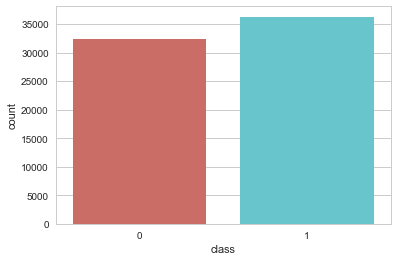

In [563]:
sns.countplot(x=train_DF['class'],data=train_DF, palette='hls')
plt.show()

# <font color=green>Check for missing values</font>

In [564]:
train_DF.isna().sum()

class                       0
lepton_pT                   0
lepton_eta                  0
lepton_phi                  0
missing_energy_magnitude    0
missing_energy_phi          0
jet1pt                      0
jet1eta                     0
jet1phi                     0
jet1b.tag                   0
jet2pt                      0
jet2eta                     0
jet2phi                     0
jet2b.tag                   0
jet3pt                      0
jet3eta                     0
jet3phi                     0
jet3b.tag                   0
jet4pt                      0
jet4eta                     0
jet4phi                     0
jet4b.tag                   0
dtype: int64

# <font color=green>Correlation plot among independent variable</font>

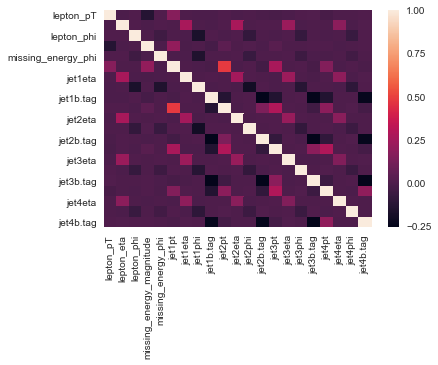

In [565]:
sns.heatmap(train_DF.corr())
plt.show()

# <font color=green>Split the data into predictor and target variable</font>

In [566]:
X = train_DF.iloc[:,1:22]
y = train_DF.iloc[:,0]

# <font color=green>Run PCA to find out feature who explained the most variance</font>

In [567]:
from sklearn.decomposition import PCA
pca = PCA(n_components=21)
principalComponents = pca.fit_transform(X)

In [568]:
pca.explained_variance_ratio_*100

array([12.23234044, 10.3476899 ,  8.96181286,  7.45789445,  6.87635339,
        6.04991925,  5.93886819,  5.85399107,  5.68980712,  4.78124109,
        4.39751785,  4.14069378,  4.02646945,  2.75632127,  2.55407864,
        2.07491334,  1.73359794,  1.59514952,  1.11922009,  0.83988814,
        0.57223222])

### Checking cumulative variance explained by PCA components

In [569]:
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

array([ 12.23,  22.58,  31.54,  39.  ,  45.88,  51.93,  57.87,  63.72,
        69.41,  74.19,  78.59,  82.73,  86.76,  89.52,  92.07,  94.14,
        95.87,  97.47,  98.59,  99.43, 100.  ])

First 20 PCA components are explaining almost 99% of variance. So we can reduce the dimension to 20 PCA components.

In [570]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X)

In [571]:
principalDf = pd.DataFrame(data = principalComponents)
principalDf.shape

(68636, 20)

In [572]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,class
0,-0.961110,1.082599,-2.010361,-0.296665,-1.876453,-0.597552,-0.437678,-0.733532,0.530284,-0.541821,...,-0.019672,0.545013,-0.009966,-0.345136,0.620505,0.608200,0.108703,-0.145346,-0.018244,1
1,-1.368562,-2.657041,0.925161,1.744479,1.647573,-0.387163,-0.658205,1.541633,-0.310506,0.291686,...,-0.055011,-0.049832,0.120979,-0.356502,-0.249508,0.019808,-0.522262,0.212884,-0.278845,1
2,-0.728454,2.303897,-1.243343,1.488419,-1.591863,0.403079,0.582845,-1.015193,-1.234756,0.350354,...,-0.596872,0.191912,-0.112379,1.662857,0.167247,0.381448,0.586947,-0.711388,0.040801,0
3,2.193213,1.143967,-0.367380,-1.464830,1.089907,-1.350493,1.591906,-1.035777,-1.410980,-0.046351,...,-0.746544,-0.629647,0.534585,-0.053228,0.378599,0.880215,0.509018,0.152103,0.362722,0
4,2.150512,1.596208,-0.401550,-1.477434,0.676365,-2.123431,1.161136,0.887478,1.246019,0.607314,...,0.625817,-1.012170,-0.807430,-0.224049,1.046507,0.408464,0.020682,-0.419909,0.285084,1


In [573]:
finalDf.shape

(68636, 21)

# <font color=green>Apply Logistic Regression on PCA components</font>

In [574]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(random_state=0)

X = finalDf.iloc[:,0:20]
y = finalDf.iloc[:,20:21]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logisticRegr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# <font color=green>K-Fold Cross validation</font>

In [575]:
model = logisticRegr

In [576]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=10,random_state=9, shuffle=True)
print(sorted(list(cross_val_score(model, X_test, y_test, cv=kf))))
#print(cross_val_score(model, X_test, y_test, cv=kf).mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[0.5203962703962703, 0.5332167832167832, 0.5396270396270396, 0.5405247813411078, 0.5501165501165501, 0.5536130536130536, 0.5553613053613053, 0.5617715617715617, 0.5658508158508159, 0.5658508158508159]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy is within the range of 52% to 56%

# <font color=green>Predict on Train data</font>

In [577]:
pred_test = logisticRegr.predict(X_test)
pred_test.shape

(17159,)

# <font color=green>Confusion Matrix Evaluation Metrics for Train Data</font>

In [578]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, pred_test)
cnf_matrix

array([[3207, 4857],
       [2839, 6256]], dtype=int64)

The result is telling us that we have 3207+6256 correct predictions and 4857+2839 incorrect predictions

Text(0.5,257.44,'Predicted Label')

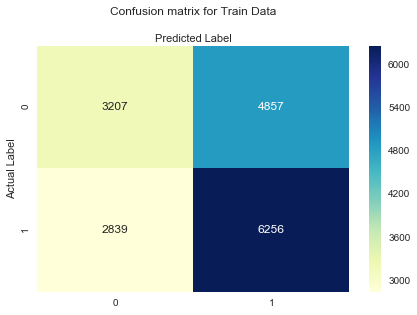

In [579]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Train Data', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [580]:
print('Accuracy : ', metrics.accuracy_score(y_test, pred_test))
print('Precision : ', metrics.precision_score(y_test, pred_test))
print('Recall : ', metrics.recall_score(y_test, pred_test))

Accuracy :  0.5514890145113351
Precision :  0.5629442994690903
Recall :  0.6878504672897197


# <font color=green>ROC Curve</font>

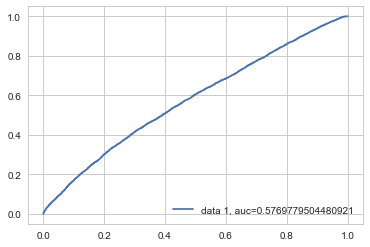

In [581]:
y_pred_proba = logisticRegr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# <font color=green>Load the Test data</font>

In [582]:
test_DF = pd.read_csv("CSE7302c_test-1539668060821.csv",sep=',', na_values=["?"])

In [583]:
test_DF = test_DF.drop(['m_jj','m_jjj','m_lv','m_jlv','m_bb','m_wbb','m_wwbb','id'], axis=1)

In [584]:
test_DF.shape

(29414, 22)

In [585]:
test_DF['class'] = test_DF['class'].astype('category')

In [586]:
test_DF.dtypes

class                       category
lepton_pT                    float64
lepton_eta                   float64
lepton_phi                   float64
missing_energy_magnitude     float64
missing_energy_phi           float64
jet1pt                       float64
jet1eta                      float64
jet1phi                      float64
jet1b.tag                    float64
jet2pt                       float64
jet2eta                      float64
jet2phi                      float64
jet2b.tag                    float64
jet3pt                       float64
jet3eta                      float64
jet3phi                      float64
jet3b.tag                    float64
jet4pt                       float64
jet4eta                      float64
jet4phi                      float64
jet4b.tag                    float64
dtype: object

In [587]:
test_DF.dropna(inplace=True)

In [588]:
X = test_DF.iloc[:,1:22]
y = test_DF.iloc[:,0]

In [589]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X)

In [590]:
principalDf = pd.DataFrame(data = principalComponents)
principalDf.shape

(29413, 20)

In [591]:
finalDf = pd.concat([principalDf, y], axis = 1)

In [592]:
X = finalDf.iloc[:,0:20]
y = finalDf.iloc[:,20:21]

In [593]:
finalDf.shape

(29413, 21)

In [594]:
pred_test = logisticRegr.predict(X)
pred_test.shape

(29413,)

In [595]:
cnf_matrix = metrics.confusion_matrix(y, pred_test)
cnf_matrix

array([[ 4562,  9304],
       [ 4359, 11188]], dtype=int64)

# <font color=green>Confusion Matrix Evaluation Metrics for Test data</font>

Text(0.5,257.44,'Predicted Label')

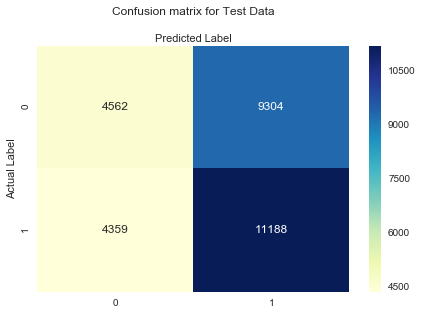

In [596]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Test Data', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [597]:
print('Accuracy : ', metrics.accuracy_score(y, pred_test))
print('Precision : ', metrics.precision_score(y, pred_test))
print('Recall : ', metrics.recall_score(y, pred_test))

Accuracy :  0.5354775099445823
Precision :  0.5459691586960765
Recall :  0.7196243648292275


# <font color=green>ROC Curve of Test Data</font>

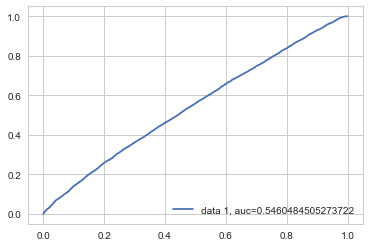

In [598]:
y_pred_proba = logisticRegr.predict_proba(X)[::,1]
fpr, tpr, _ = metrics.roc_curve(y, y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Building Model on the high-level features derived by physicists to help discriminate between the two classes
# i.e. features/columns : ['m_jj','m_jjj','m_lv','m_jlv','m_bb','m_wbb','m_wwbb']

In [4]:
train_DF_2 = pd.read_csv("CSE7302c_train-1539668060821.csv",sep=',')

In [11]:
train_DF_Selected = train_DF_2.loc[:,['class','m_jj','m_jjj','m_lv','m_jlv','m_bb','m_wbb','m_wwbb']]

In [12]:
train_DF_Selected.shape

(68636, 8)

In [13]:
train_DF_Selected.head()

,class,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,0,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818
4,1,0.869418,1.222083,1.000627,0.545045,0.698653,0.977314,0.828786


In [15]:
    train_DF_Selected['class'] = train_DF_Selected['class'].astype('category')

In [17]:
train_DF_Selected.describe()

,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000
mean,1.031975,1.022349,1.050091,1.010198,0.972071,1.031742,0.959118
std,0.648727,0.369765,0.166135,0.399576,0.521868,0.363594,0.313324
min,0.110875,0.310499,0.133012,0.295983,0.048125,0.362572,0.403166
25%,0.791868,0.846218,0.985762,0.766271,0.671995,0.819659,0.770090
50%,0.896056,0.950510,0.989726,0.916662,0.873269,0.947334,0.871402
75%,1.026683,1.083862,1.020199,1.141150,1.138059,1.138514,1.056399
max,16.131908,8.940148,4.565248,7.442589,8.407887,7.318191,6.015647


In [18]:
train_DF_Selected.dtypes

class     category
m_jj       float64
m_jjj      float64
m_lv       float64
m_jlv      float64
m_bb       float64
m_wbb      float64
m_wwbb     float64
dtype: object

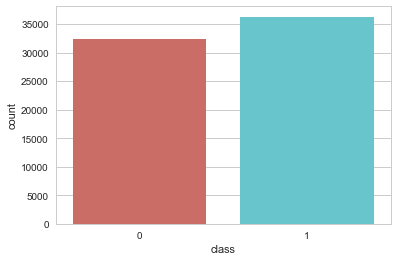

In [19]:
sns.countplot(x=train_DF_Selected['class'], data=train_DF_Selected, palette='hls')
plt.show()

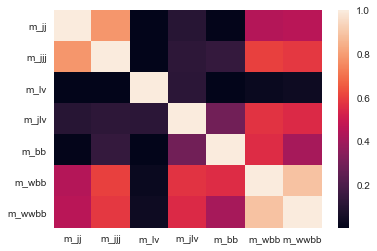

In [20]:
sns.heatmap(train_DF_Selected.corr())
plt.show()

In [23]:
X = train_DF_Selected.iloc[:,1:8]
y = train_DF_Selected.iloc[:,0]

In [24]:
X.head()

,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818
4,0.869418,1.222083,1.000627,0.545045,0.698653,0.977314,0.828786


In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(X)

In [32]:
principalComponents.shape

(68636, 7)

In [33]:
pca.explained_variance_ratio_*100

array([50.30214267, 28.2206785 , 11.45967435,  4.89610937,  2.25080465,
        2.08209257,  0.7884979 ])

In [34]:
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

array([ 50.3 ,  78.52,  89.98,  94.88,  97.13,  99.21, 100.  ])

In [35]:
principalDf = pd.DataFrame(data = principalComponents)
principalDf.shape

(68636, 7)

In [36]:
principalDf

,0,1,2,3,4,5,6
0,-0.715953,0.186832,0.160752,0.212393,0.003126,-0.093423,-0.103746
1,-0.221549,-0.174827,-0.006224,0.024045,0.083863,-0.175162,-0.000423
2,-0.142700,-0.130654,-0.145649,0.188602,-0.068445,0.027804,-0.019389
3,-0.384483,-0.374452,0.166392,0.266487,-0.123513,0.034700,-0.020428
4,-0.256271,-0.341935,-0.228057,0.360436,0.060549,-0.082050,-0.070153
5,-0.251050,-0.183779,-0.152828,0.085273,0.040527,-0.122221,-0.032281
6,3.265277,0.744556,0.114323,2.704598,0.715519,-0.401985,-0.264453
7,-0.392686,-0.186081,-0.024245,-0.031296,0.055427,-0.133790,0.004877
8,-0.222831,-0.007545,-0.579160,0.004543,0.006564,-0.055819,0.025620
9,-0.533368,0.227389,0.389640,-0.118210,-0.012421,-0.124506,-0.078946


In [37]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,0,1,2,3,4,5,6,class
0,-0.715953,0.186832,0.160752,0.212393,0.003126,-0.093423,-0.103746,1
1,-0.221549,-0.174827,-0.006224,0.024045,0.083863,-0.175162,-0.000423,1
2,-0.142700,-0.130654,-0.145649,0.188602,-0.068445,0.027804,-0.019389,0
3,-0.384483,-0.374452,0.166392,0.266487,-0.123513,0.034700,-0.020428,0
4,-0.256271,-0.341935,-0.228057,0.360436,0.060549,-0.082050,-0.070153,1


In [38]:
# Applying LR on PCA
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(random_state=0)

In [57]:
train_x = finalDf.iloc[:,0:7]
train_y = finalDf.iloc[:,7:8]

In [58]:
train_x.head()

,0,1,2,3,4,5,6
0,-0.715953,0.186832,0.160752,0.212393,0.003126,-0.093423,-0.103746
1,-0.221549,-0.174827,-0.006224,0.024045,0.083863,-0.175162,-0.000423
2,-0.142700,-0.130654,-0.145649,0.188602,-0.068445,0.027804,-0.019389
3,-0.384483,-0.374452,0.166392,0.266487,-0.123513,0.034700,-0.020428
4,-0.256271,-0.341935,-0.228057,0.360436,0.060549,-0.082050,-0.070153


In [59]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, random_state=0)

In [60]:
y_train.head()

,class
22017,0
21021,1
15090,1
47816,1
63219,1


In [97]:
X_test.shape

(17159, 7)

In [90]:
logIt = logisticRegr.fit(X_train, y_train)

C:\Users\Prateek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [93]:
logIt

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
pred_test = logisticRegr.predict(X_test)
pred_test.shape

(17159,)

In [94]:
logIt.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [89]:
pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, pred_test)
cnf_matrix

array([[3685, 4379],
       [1904, 7191]], dtype=int64)

Text(0.5,257.44,'Predicted Label')

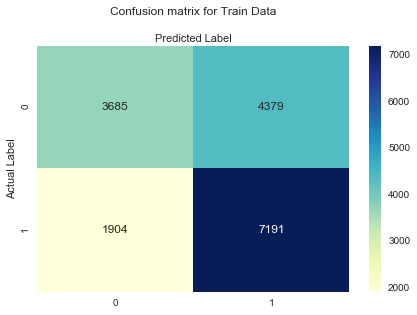

In [65]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Train Data', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [66]:
print('Accuracy : ', metrics.accuracy_score(y_test, pred_test))
print('Precision : ', metrics.precision_score(y_test, pred_test))
print('Recall : ', metrics.recall_score(y_test, pred_test))

Accuracy :  0.6338364706567982
Precision :  0.6215211754537597
Recall :  0.7906542056074767


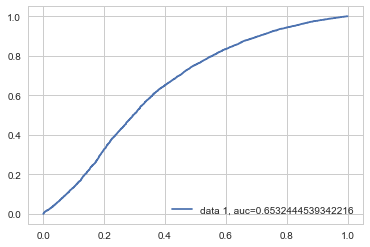

In [67]:
y_pred_proba = logisticRegr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# So model is above 65%, so will now test this model on actual data

In [68]:
actual_test_DF = pd.read_csv("CSE7302c_test-1539668060821.csv",sep=',', na_values=["?"])

In [69]:
actual_test_DF_Selected = actual_test_DF.loc[:,['class','m_jj','m_jjj','m_lv','m_jlv','m_bb','m_wbb','m_wwbb']]

In [71]:
actual_test_DF_Selected['class'] = actual_test_DF_Selected['class'].astype('category')

In [75]:
actual_test_DF_Selected.dtypes

class     category
m_jj       float64
m_jjj      float64
m_lv       float64
m_jlv      float64
m_bb       float64
m_wbb      float64
m_wwbb     float64
dtype: object

In [76]:
actual_test_DF_Selected.shape

(29414, 8)

In [77]:
actual_test_DF_Selected.dropna(inplace=True)

In [78]:
actual_test_DF_Selected.shape

(29413, 8)

In [79]:
actual_test_DF_Selected.head()

,class,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
1,1,0.833175,0.773968,0.985750,1.103696,0.849140,0.937104,0.812364
2,1,0.959325,0.807376,1.191814,1.221210,0.861141,0.929341,0.838302
3,1,0.782073,0.672103,0.990002,0.734279,0.379074,0.764760,0.642924
4,0,1.006643,0.867914,0.999090,1.109608,1.125094,0.882899,0.859396


In [81]:
X = actual_test_DF_Selected.iloc[:,1:8]
y = actual_test_DF_Selected.iloc[:,0]

In [87]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: class, dtype: category
Categories (2, int64): [0, 1]

# Predicting on Final Test Data

In [98]:
X.head()

,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
1,0.833175,0.773968,0.985750,1.103696,0.849140,0.937104,0.812364
2,0.959325,0.807376,1.191814,1.221210,0.861141,0.929341,0.838302
3,0.782073,0.672103,0.990002,0.734279,0.379074,0.764760,0.642924
4,1.006643,0.867914,0.999090,1.109608,1.125094,0.882899,0.859396


In [99]:
X.shape

(29413, 7)

In [106]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(X)

In [107]:
principalDf = pd.DataFrame(data = principalComponents)
principalDf.shape

(29413, 7)

In [108]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,0,1,2,3,4,5,6,class
0,-0.167421,0.070314,-0.272031,0.195677,0.318395,-0.213305,0.075355,1
1,-0.338108,0.002981,0.137716,-0.139371,-0.066687,-0.052284,-0.059305,1
2,-0.200949,-0.006711,0.212025,-0.234238,0.049943,0.110520,-0.033954,1
3,-0.701956,-0.512534,0.078108,-0.020922,-0.140852,0.007616,-0.122836,1
4,-0.115314,0.110610,-0.047052,-0.243028,-0.014265,-0.058661,0.048103,0


In [109]:
transformed_x = finalDf.iloc[:,0:7]
same_test_y = finalDf.iloc[:,7:8]

In [110]:
transformed_x

,0,1,2,3,4,5,6
0,-0.167421,0.070314,-0.272031,0.195677,0.318395,-0.213305,0.075355
1,-0.338108,0.002981,0.137716,-0.139371,-0.066687,-0.052284,-0.059305
2,-0.200949,-0.006711,0.212025,-0.234238,0.049943,0.110520,-0.033954
3,-0.701956,-0.512534,0.078108,-0.020922,-0.140852,0.007616,-0.122836
4,-0.115314,0.110610,-0.047052,-0.243028,-0.014265,-0.058661,0.048103
5,-0.227831,-0.450867,0.416768,0.191609,-0.377728,0.148709,0.455137
6,0.280391,-0.304992,-0.407422,-0.321869,0.026838,0.019011,0.006806
7,-0.318079,-0.151136,-0.194850,0.049737,0.078457,-0.030290,-0.010667
8,-0.061425,0.510538,0.130024,-0.130017,0.096188,-0.142839,0.017804
9,-0.308845,-0.037835,0.612927,-0.281530,0.145693,0.621738,0.035364


In [111]:
predicted_values_test = logIt.predict(transformed_x)
predicted_values_test.shape

(29413,)

In [112]:
predicted_values_test

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [113]:
same_test_y.shape

(29413, 1)

In [116]:
cnf_matrix = metrics.confusion_matrix(same_test_y, predicted_values_test)
cnf_matrix

array([[ 6175,  7691],
       [ 3405, 12142]], dtype=int64)

Text(0.5,257.44,'Predicted Label')

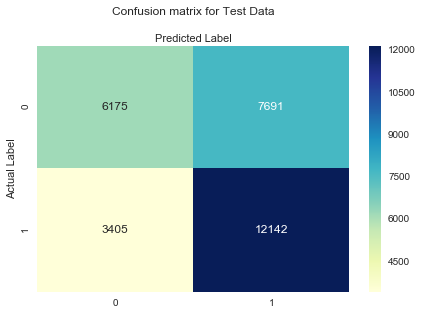

In [115]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Test Data', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [117]:
print('Accuracy : ', metrics.accuracy_score(same_test_y, predicted_values_test))
print('Precision : ', metrics.precision_score(same_test_y, predicted_values_test))
print('Recall : ', metrics.recall_score(same_test_y, predicted_values_test))

Accuracy :  0.6227518444225343
Precision :  0.6122119699490748
Recall :  0.7809866855341867


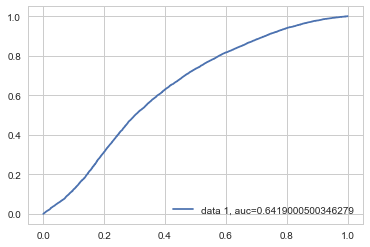

In [119]:
y_pred_proba = logisticRegr.predict_proba(transformed_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(y, y_pred_proba)
auc = metrics.roc_auc_score(same_test_y, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Model with 65% AUC value